In [229]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
cd 'drive/My Drive/Colab Notebooks/Lab3'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/Lab3'
/content/drive/My Drive/Colab Notebooks/Lab3


# Lab 3 - Neural Networks

In this lab we will train a neural network to classifie images, from a data set.

To preform this task we will use the following libraries and settings:


In [231]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
import numpy as np
import sklearn.metrics as sklm
import pandas as pd
from visualize_activations import visualize_activations

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})


## 1. Load Data

### 1.1 Load and check size

In [232]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train shape = {}\ny_train shape = {}\nx_test shape ={}\ny_test shape = {}\n".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train shape = (60000, 28, 28)
y_train shape = (60000,)
x_test shape =(10000, 28, 28)
y_test shape = (10000,)



### 1.2 Check Images

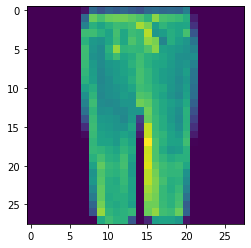

In [233]:
plt.imshow((x_test[190]))

### 1.3 Put the valeus between 0-1

In [234]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
print(x_train[5][1])

[0.000 0.000 0.000 0.004 0.000 0.000 0.078 0.514 0.780 0.808 0.769 0.792
 0.949 1.000 1.000 0.980 0.871 0.773 0.808 0.737 0.494 0.067 0.000 0.000
 0.000 0.000 0.000 0.000]


### 1.4 Transforming labels to one hot enconding

In [235]:
M_y_train = keras.utils.to_categorical(y_train, num_classes = 10)
print(M_y_train)

[[0.000 0.000 0.000 ... 0.000 0.000 1.000]
 [1.000 0.000 0.000 ... 0.000 0.000 0.000]
 [1.000 0.000 0.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [1.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]]


### 1.5 Split the data


In [236]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x_train, M_y_train, test_size = 0.2, shuffle = False)
print("X_train shape = {}\nY_train shape = {}\nX_test shape ={}\nY_test shape = {}\n".format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X_train shape = (48000, 28, 28)
Y_train shape = (48000, 10)
X_test shape =(12000, 28, 28)
Y_test shape = (12000, 10)



### 1.6 Add fourth dimension

In [237]:
X_train_4 = np.expand_dims(X_train, -1)
X_test_4 = np.expand_dims(X_test, axis = 3)
print("X_train_4 shape: ", X_train_4.shape)
print("X_test_4 shape: ", X_test_4.shape)

X_train_4 shape:  (48000, 28, 28, 1)
X_test_4 shape:  (12000, 28, 28, 1)


## 2. Multilayer Percepton

In this section we will create and train a multilayer percepton that will classifie the data

### 2.1 - 2.3 Creating the model



In [238]:
##2.1
model_MMP = keras.Sequential()
model_MMP.add(keras.layers.Flatten(input_shape = (28, 28, 1)))
#2.2
model_MMP.add(keras.layers.Dense(32, activation='relu'))
model_MMP.add(keras.layers.Dense(64, activation = 'relu'))
#2.3
model_MMP.add(keras.layers.Dense(10, activation = 'softmax'))

### 2.4 Summary of the network

In [239]:
model_MMP.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


### 2.4 Creating an early stopping

In [240]:
callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

### 2.5 Training the model

In [241]:
#model_MMP.compile(optimizer= 'Adam', loss='categorical_crossentropy')
#history = model_MMP.fit(X_train_4, Y_train, batch_size=200, epochs=200, callbacks=[callback], validation_split=0.1)

### 2.5.1 Importing the model

We executed the 2.5 code in our local machine and will now import the results to continue the report

In [242]:
model_MMP.load_weights('my_model_weights_ML_1.h5')
log_data = pd.read_csv('training_ML_1.log', sep=',', engine='python')

### 2.6 Plotting loss functions

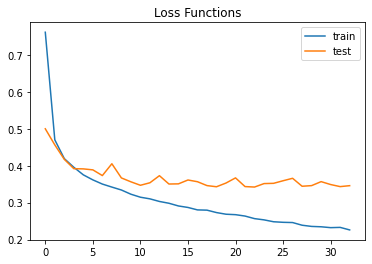

In [243]:
plt.title('Loss Functions')
plt.plot(log_data['loss'], label= 'train')
plt.plot(log_data['val_loss'], label = 'test')
plt.legend()

### 2.7 Evaluating performance


In [244]:
#remove from the one-hot enconding
decoded = np.argmax(Y_test, axis = -1)
#predict a class
prediction =  np.argmax(model_MMP.predict(X_test_4), axis = -1)
print(sklm.accuracy_score(decoded, prediction, normalize = True))
print(sklm.confusion_matrix(decoded, prediction, normalize = 'true'))

0.8794166666666666
[[0.861 0.002 0.021 0.036 0.002 0.002 0.069 0.000 0.007 0.000]
 [0.003 0.971 0.001 0.021 0.002 0.000 0.001 0.000 0.002 0.000]
 [0.014 0.002 0.852 0.011 0.066 0.000 0.046 0.000 0.008 0.000]
 [0.031 0.007 0.007 0.904 0.034 0.000 0.012 0.000 0.004 0.000]
 [0.002 0.004 0.129 0.033 0.767 0.001 0.060 0.000 0.004 0.000]
 [0.000 0.000 0.000 0.001 0.000 0.936 0.001 0.039 0.007 0.016]
 [0.148 0.003 0.115 0.018 0.076 0.000 0.626 0.000 0.014 0.001]
 [0.000 0.000 0.000 0.000 0.000 0.017 0.000 0.965 0.002 0.016]
 [0.006 0.000 0.005 0.004 0.006 0.000 0.006 0.003 0.970 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.053 0.000 0.935]]


### 2.8 No callback training

In [245]:
##2.1
model_MMP2 = keras.Sequential()
model_MMP2.add(keras.layers.Flatten(input_shape = (28, 28, 1)))
#2.2
model_MMP2.add(keras.layers.Dense(32, activation='relu'))
model_MMP2.add(keras.layers.Dense(64, activation = 'relu'))
#2.3
model_MMP2.add(keras.layers.Dense(10, activation = 'softmax'))

#model.compile(optimizer= 'Adam', loss='categorical_crossentropy')
#history = model.fit(X_train_4, Y_train, batch_size=200, epochs=200, validation_split=0.1)

### 2.8.1 Load new model

Lets first notice that this model took more time to train, since it had to perform all the 200 iterations

In [246]:
model_MMP2.load_weights('my_model_weights_ML_2.h5')
log_data2 = pd.read_csv('training_ML_2.log', sep=',', engine='python')

### 2.8.2 Plot loss Functions

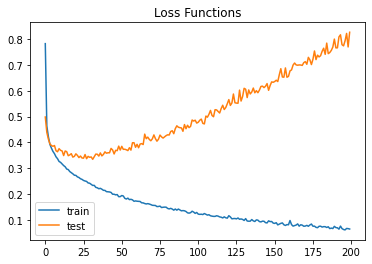

In [247]:
plt.title('Loss Functions')
plt.plot(log_data2['loss'], label= 'train')
plt.plot(log_data2['val_loss'], label = 'test')
plt.legend()

### 2.8.3 Evaluate Performance

In [248]:
#predict a class
prediction2 =  np.argmax(model_MMP2.predict(X_test_4), axis = -1)
print(sklm.accuracy_score(decoded, prediction2, normalize = True))
print(sklm.confusion_matrix(decoded, prediction2, normalize = 'true'))

0.8683333333333333
[[0.837 0.002 0.014 0.019 0.003 0.001 0.116 0.000 0.007 0.001]
 [0.001 0.977 0.002 0.013 0.002 0.000 0.004 0.001 0.001 0.000]
 [0.023 0.002 0.781 0.010 0.085 0.002 0.091 0.000 0.006 0.000]
 [0.043 0.017 0.004 0.849 0.037 0.001 0.043 0.000 0.006 0.000]
 [0.008 0.007 0.082 0.029 0.816 0.000 0.056 0.000 0.002 0.000]
 [0.001 0.003 0.002 0.003 0.002 0.914 0.000 0.048 0.003 0.026]
 [0.117 0.008 0.069 0.018 0.091 0.000 0.684 0.001 0.010 0.001]
 [0.000 0.000 0.000 0.000 0.000 0.024 0.001 0.942 0.002 0.031]
 [0.012 0.002 0.007 0.003 0.008 0.003 0.012 0.004 0.951 0.000]
 [0.002 0.002 0.001 0.001 0.000 0.010 0.000 0.053 0.000 0.931]]


The results will be commented in section 4.1

##3. Convolutional Neural Networks

### 3.1 Creating the Network

In [249]:
model_CNN = keras.Sequential()
model_CNN.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model_CNN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_CNN.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu'))
model_CNN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(32, activation='relu'))
model_CNN.add(keras.layers.Dense(10, activation='softmax'))

### 3.2 Summary of the model

In [250]:
model_CNN.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 32)                12832     
_________________________________________________________________
dense_55 (Dense)             (None, 10)              

### 3.3 Training the model


In [251]:
#model_CNN.compile(optimizer= 'Adam', loss='categorical_crossentropy')
#history = model.fit(X_train_4, Y_train, batch_size=200, epochs=2, callbacks=[callback], validation_split=0.1)

### 3.3.1 Importing the model


In [252]:
model_CNN.load_weights('my_model_weights_CNN.h5')
log_data3 = pd.read_csv('training_CNN.log', sep=',', engine='python')

### 3.4 Ploting Loss Functions


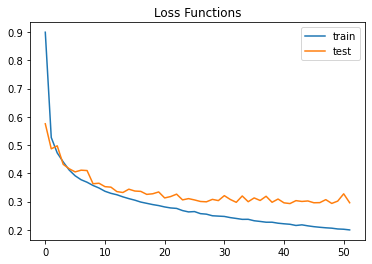

In [253]:
plt.title('Loss Functions')
plt.plot(log_data3['loss'], label= 'train')
plt.plot(log_data3['val_loss'], label = 'test')
plt.legend()

### 3.5 Evaluate Performance

In [254]:
prediction3 =  np.argmax(model_CNN.predict(X_test_4), axis = -1)
print(sklm.accuracy_score(decoded, prediction3, normalize = True))
print(sklm.confusion_matrix(decoded, prediction3, normalize = 'true'))

0.8958333333333334
[[0.850 0.002 0.025 0.020 0.002 0.002 0.090 0.000 0.009 0.000]
 [0.002 0.978 0.000 0.013 0.001 0.000 0.001 0.000 0.004 0.000]
 [0.015 0.002 0.873 0.006 0.045 0.001 0.052 0.000 0.006 0.000]
 [0.024 0.008 0.006 0.911 0.028 0.000 0.020 0.000 0.002 0.000]
 [0.000 0.002 0.090 0.033 0.812 0.000 0.056 0.001 0.007 0.000]
 [0.000 0.000 0.000 0.001 0.000 0.966 0.000 0.024 0.003 0.006]
 [0.117 0.003 0.105 0.023 0.082 0.001 0.665 0.000 0.005 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.018 0.000 0.970 0.000 0.012]
 [0.003 0.000 0.003 0.000 0.004 0.003 0.004 0.003 0.979 0.001]
 [0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.047 0.000 0.949]]


### 3.6 Visualize Activation



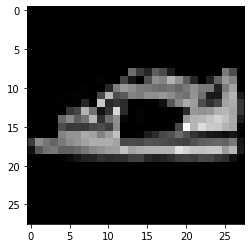

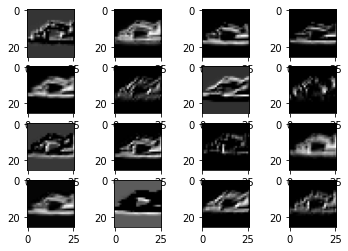

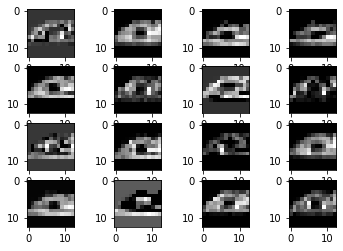

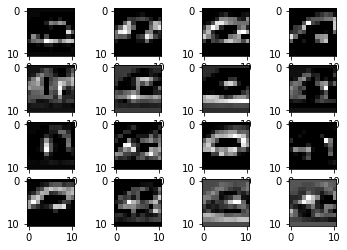

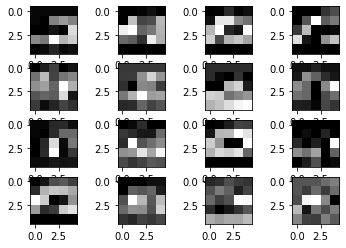

In [255]:
visualize_activations(model_CNN, [0, 1, 2, 3], X_train[13])

## 4. Comments

### 4.1 Overfitting in the models

We saw a big difference between the models trained in section 2.5 and 2.8, where the first had an early stopping condition and the other did not.

As we saw in secction 2.8.2, as the loss went down the val loss went up, that is because we were overfitting our model to our dataset, this way it becomes too specialized in representing the training data and performs much worse with new data.

That happened mainly in the model 2.8 that did not have an early stopping condition and it was the only one where the loss in the test data increased while in the trainning data decreased.

### 4.2. Differences between MLP and CNN

4.2)As we saw in secctions 2.4 and 3.2, the Multilayer Percepton has 27.882 parameter while the Convolutional Neural Network has 15.642. That huge difference can be explained by the fact that the MLP is a fully connected network while in the CNN each neuron is connected to only a few neurons from the previous layer and neurons share weights, reducing the number of parameters.

Regarding performance, we verified that in section 2 the accuracy score of the MLP and the CNN is 0.879 and 0.896 respectively, showing that CNN are better for image classification problems


### 4.3 Confusion matrix of the CNN

4.3)As we expect from a good model the confusion matrix resembles the identity matrix, with values close to one in the diagonal and zeros in other places.

However giving it more attention we can check that there were some difficulties trying to predict class 7. For this class, the element in the diagonal is only 0.655 and the CNNmissclassified classes 0 and 2 more than 10% of the times!

On the other hand our CNN is very strong identifying classes 1, 5, 7, 8 and 9, getting it right more than 95% of times.

When we compare it with the MLP's confusion matrix we see that they have the same weaknesses and strengths. But the CNN outperfomes the MLP in every classification.

### 4.4 Activation Images

4.4)In section 3.6, we analyzed the first 4 layers of the Network (2 Conv2D layers and 2 MaxPool2D layers). We can verify that the first Conv2D layer keeps the general shape of the initial image, retaining almost all information. As we go deeper into the feature map, the images start to get more and more blurry as they encode more information about the class of the image and less about the visual content of it.

In the end they are completely abstract and we can not understand them.